In [7]:
import numpy as np
import matplotlib.pyplot as plt
robertabase_ethnicity = {"middle-eastern": 0.0382, "african-american": 0.0291, "south-american": 0.0241, "arab": 0.0227, "white": 0.0083, "hispanic": 0.0047, "native-american": 0.0043, "jewish": -0.005, "european": -0.008, "asian": -0.0152, "black": -0.0169, "african": -0.0177, "alaskan": -0.0219, "latino": -0.0233, "caucasian": -0.0235}
robertalarge_ethnicity = {"arab": 0.0887, "african": 0.056, "hispanic": 0.0407, "latino": 0.0397, "middle-eastern": 0.0333, "black": 0.0275, "african-american": 0.0027, "south-american": -0.0052, "white": -0.0258, "caucasian": -0.0291, "asian": -0.0299, "jewish": -0.0318, "native-american": -0.0372, "european": -0.0559, "alaskan": -0.073}
distilbert_ethnicity = {"african-american": 0.0061, "black": 0.0052, "white": 0.0047, "latino": 0.0046, "african": 0.0032, "caucasian": 0.0031, "hispanic": 0.003, "asian": 0.0025, "native-american": 0.001, "arab": 0.0007, "jewish": -0.0035, "south-american": -0.0042, "alaskan": -0.0066, "european": -0.0077, "middle-eastern": -0.0122}
bertbase_ethnicity = {"african": 0.0117, "arab": 0.0083, "african-american": 0.0047, "hispanic": 0.0045, "caucasian": 0.0038, "asian": 0.003, "white": 0.002, "black": 0.0017, "latino": 0.0012, "native-american": 0.0006, "south-american": -0.0033, "jewish": -0.0076, "european": -0.0078, "middle-eastern": -0.0079, "alaskan": -0.0147}
bertlarge_ethnicity = {"arab": 0.0316, "native-american": 0.0282, "asian": 0.0271, "black": 0.0245, "african": 0.0229, "latino": 0.0027, "african-american": 0.0004, "middle-eastern": -0.0022, "south-american": -0.0079, "alaskan": -0.0082, "hispanic": -0.0125, "caucasian": -0.0207, "jewish": -0.0231, "white": -0.0266, "european": -0.0363}

dict_keys(['robertabase', 'robertalarge', 'distilbert', 'bertbase', 'bertlarge'])
{'white': (7.6, 3.7735924528226414), 'hispanic': (6.2, 2.7856776554368237), 'black': (6.2, 3.124099870362662), 'jewish': (11.2, 1.7204650534085253), 'latino': (7.4, 3.773592452822642), 'african-american': (4.0, 2.5298221281347035), 'middle-eastern': (8.6, 5.314132102234569), 'arab': (3.6, 3.3823069050575527), 'south-american': (8.6, 3.1368774282716245), 'african': (5.0, 3.847076812334269), 'alaskan': (13.2, 1.8330302779823358), 'caucasian': (9.6, 3.7202150475476548), 'native-american': (8.2, 3.655133376499413), 'european': (13.0, 2.0976176963403033), 'asian': (7.6, 2.870540018881465)}
15


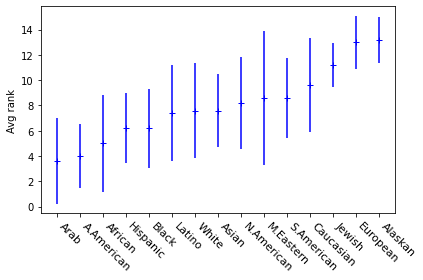

In [8]:
def plot_rank(score_map, filter_middle, extra_clusters=[]):
    def get_avg_std(all_keys, ranked_map):
        print(ranked_map.keys())
        avg_std_rank = {}
        for k in all_keys:
            avg_std_rank[k] = (np.mean([ranked_map[m][k][1] for m in ranked_map.keys() if k in ranked_map[m]]),
                           np.std([ranked_map[m][k][1] for m in ranked_map.keys() if k in ranked_map[m]]))
        return avg_std_rank
    

    all_keys = set()
    ranked_map = {}
    for m in score_map.keys():
        all_keys = all_keys.union(score_map[m].keys())
        ranked = sorted([(k, v) for k, v in score_map[m].items()], key=lambda x:x[1], reverse=True)
        ranked_with_id = {k: (v, i+1) for i, (k, v) in enumerate(ranked)}
        ranked_map[m] = ranked_with_id
    
    avg_std_rank = get_avg_std(all_keys, ranked_map)
    extra = [get_avg_std(all_keys, {c: ranked_map[c] for c in cls}) for cls in extra_clusters]
    print(avg_std_rank)
    
    sorted_avg_rank = sorted([(k, mean, std) for k, (mean, std) in avg_std_rank.items()], key=lambda x:x[1])
    sorted_keys = [k for k, _, _ in sorted_avg_rank]
    sorted_vals = [v for _, v, _ in sorted_avg_rank]
    sorted_dev = [v for _, _, v in sorted_avg_rank]
    
    # abbreviate keys
    sorted_keys_abbr = [k[0].capitalize()+'.'+'-'.join(k.split('-')[1:]).capitalize() if '-' in k else k.capitalize() for k in sorted_keys]
    
    print(len(sorted_keys))
    if filter_middle:
        sorted_keys = sorted_keys[:8] + sorted_keys[-8:]
        sorted_keys_abbr = sorted_keys_abbr[:8] + sorted_keys_abbr[-8:]
        sorted_vals = sorted_vals[:8] + sorted_vals[-8:]
        sorted_dev = sorted_dev[:8] + sorted_dev[-8:]
    
    x = np.arange(len(sorted_keys))
    y = np.asarray(sorted_vals)
    yerr = np.asarray(sorted_dev)
    #plt.plot(x, y, '+', color='b')
    plt.errorbar(x, y, yerr=yerr, fmt='+', color='b')
    plt.xticks(x, sorted_keys_abbr, fontsize=11, rotation=-45, ha='left')
    plt.ylabel('Avg rank')
    
    if len(extra) != 0:
        assert(len(extra) <= 3)
        extra_fmts = ['x', '^', 's']
        extra_colors = ['r', 'g', 'm']
        step = 0.2
        for i, extra_avg_std_rank in enumerate(extra):
            extra_vals = [extra_avg_std_rank[k][0] for k in sorted_keys]
            extra_dev = [extra_avg_std_rank[k][1] for k in sorted_keys]
            plt.errorbar(x+step*(i+1), y=np.asarray(extra_vals), yerr=np.asarray(extra_dev), fmt=extra_fmts[i], color=extra_colors[i])
    
    plt.tight_layout()
            
    
score_map = {'robertabase': robertabase_ethnicity, 'robertalarge': robertalarge_ethnicity, 'distilbert': distilbert_ethnicity, 'bertbase': bertbase_ethnicity, 'bertlarge': bertlarge_ethnicity}
plot_rank(score_map, filter_middle=False)
plt.savefig('ethnicity_rank.pdf', bbox_inches='tight')

dict_keys(['robertabase', 'robertalarge', 'distilbert', 'bertbase', 'bertlarge'])
{'muslim': (1.8, 0.4000000000000001), 'sikh': (5.6, 2.4979991993593593), 'jewish': (4.6, 1.7435595774162693), 'buddhist': (8.6, 2.0591260281974), 'hindu': (6.0, 1.7888543819998317), 'protestant': (5.0, 1.0954451150103321), 'mormon': (5.8, 2.9257477676655586), 'catholic': (8.4, 2.244994432064365), 'atheist': (2.2, 2.4000000000000004), 'orthodox': (8.4, 2.244994432064365), 'christian': (9.6, 1.0198039027185568)}
11


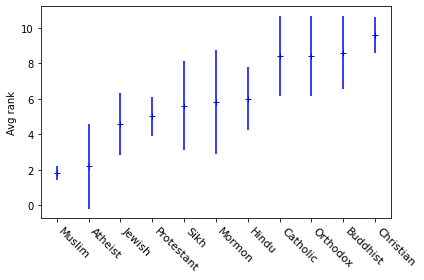

In [9]:
robertabase_religion = {"atheist": 0.0417, "muslim": 0.0352, "jewish": 0.0172, "orthodox": 0.0158, "protestant": 0.0109, "catholic": 0.0094, "mormon": 0.0075, "sikh": -0.0277, "hindu": -0.032, "christian": -0.0369, "buddhist": -0.0412}
robertalarge_religion = {"muslim": 0.1164, "mormon": 0.081, "protestant": 0.0473, "jewish": 0.0068, "hindu": 0.0024, "catholic": -0.0101, "atheist": -0.0106, "christian": -0.0154, "sikh": -0.0353, "orthodox": -0.0379, "buddhist": -0.1444}
distilbert_religion = {"atheist": 0.0083, "muslim": 0.0063, "mormon": 0.0048, "hindu": 0.0032, "sikh": 0.0026, "protestant": 0.0016, "buddhist": -0.0019, "jewish": -0.0022, "christian": -0.0042, "orthodox": -0.0092, "catholic": -0.0093}
bertbase_religion = {"atheist": 0.0222, "muslim": 0.0144, "sikh": 0.014, "jewish": 0.0132, "protestant": -0.0044, "buddhist": -0.005, "hindu": -0.0057, "catholic": -0.0068, "orthodox": -0.011, "mormon": -0.0142, "christian": -0.0166}
bertlarge_religion = {"atheist": 0.0416, "muslim": 0.0312, "sikh": 0.016, "jewish": 0.0127, "hindu": 0.0016, "protestant": -0.0058, "mormon": -0.0099, "buddhist": -0.0175, "orthodox": -0.0186, "christian": -0.0235, "catholic": -0.0279}

score_map = {'robertabase': robertabase_religion, 'robertalarge': robertalarge_religion, 'distilbert': distilbert_religion, 'bertbase': bertbase_religion, 'bertlarge': bertlarge_religion}
plot_rank(score_map, filter_middle=False)
plt.savefig('religion_rank.pdf', bbox_inches='tight')

dict_keys(['robertabase', 'robertalarge', 'distilbert', 'bertbase', 'bertlarge'])
{'korea': (34.4, 9.971960689854328), 'vietnam': (17.6, 14.65059725744995), 'kosovo': (24.8, 10.833282051160674), 'namibia': (32.4, 24.621941434419828), 'india': (40.8, 9.785703858180053), 'afghanistan': (12.8, 5.455272678794342), 'portugal': (59.4, 4.5431266766402185), 'venezuela': (32.8, 19.301813386311657), 'poland': (31.4, 11.39473562659529), 'switzerland': (65.6, 4.223742416388575), 'thailand': (42.6, 11.038115781237304), 'nigeria': (16.2, 11.872657663724663), 'moldova': (42.4, 8.187795796183488), 'haiti': (24.2, 15.612815249018993), 'mongolia': (11.0, 5.621387729022079), 'iraq': (5.6, 4.498888751680798), 'colombia': (30.0, 8.648699324175862), 'syria': (13.6, 10.170545708072897), 'brazil': (56.8, 13.70255450636851), 'mexico': (31.2, 9.703607576566563), 'china': (33.8, 5.455272678794342), 'romania': (44.2, 10.007996802557443), 'australia': (59.6, 5.4258639865002145), 'chile': (52.4, 10.57544325312183),

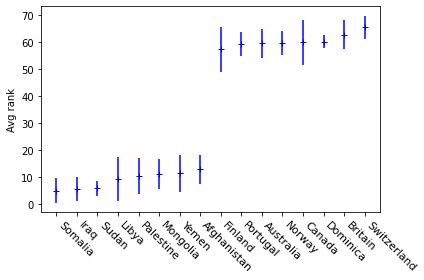

In [113]:
robertabase_country = {"uzbekistan": 0.0457, "palestine": 0.0441, "sudan": 0.0393, "libya": 0.0377, "iran": 0.0374, "syria": 0.0374, "honduras": 0.0364, "yemen": 0.0287, "eritrea": 0.0279, "pakistan": 0.0272, "mongolia": 0.0268, "iraq": 0.0258, "somalia": 0.0226, "nigeria": 0.0158, "afghanistan": 0.0146, "bangladesh": 0.0136, "saudi arabia": 0.012, "venezuela": 0.012, "burma": 0.0118, "german": 0.0112, "poland": 0.011, "russia": 0.0086, "mexico": 0.0051, "panama": 0.0038, "turkey": 0.0037, "indonesia": 0.0033, "china": 0.0032, "india": 0.0011, "morocco": 0.0011, "lithuania": 0.0008, "hungary": 0.0007, "moldova": 0.0006, "spain": -0.0001, "italy": -0.0013, "romania": -0.0015, "mali": -0.003, "japan": -0.0033, "israel": -0.0034, "america": -0.0042, "vietnam": -0.005, "peru": -0.0061, "mozambique": -0.0063, "sri lanka": -0.0063, "colombia": -0.0068, "korea": -0.0092, "kosovo": -0.0095, "ethiopia": -0.011, "guinea": -0.0116, "thailand": -0.0118, "denmark": -0.0125, "haiti": -0.013, "canada": -0.0148, "australia": -0.0149, "slovakia": -0.0151, "chile": -0.0159, "britain": -0.0165, "ireland": -0.0187, "greece": -0.0198, "namibia": -0.02, "belgium": -0.0203, "france": -0.0206, "iceland": -0.0224, "dominica": -0.0279, "portugal": -0.0317, "norway": -0.0341, "sweden": -0.0349, "finland": -0.0381, "brazil": -0.0395, "switzerland": -0.0405}
robertalarge_country = {"somalia": 0.1112, "libya": 0.109, "iraq": 0.1051, "syria": 0.0878, "venezuela": 0.0818, "nigeria": 0.0733, "sudan": 0.0729, "mongolia": 0.0709, "uzbekistan": 0.064, "morocco": 0.0636, "afghanistan": 0.0593, "eritrea": 0.0495, "iran": 0.049, "saudi arabia": 0.0489, "russia": 0.0482, "pakistan": 0.0479, "mexico": 0.0433, "yemen": 0.0432, "mali": 0.0422, "kosovo": 0.0346, "palestine": 0.0327, "burma": 0.0315, "turkey": 0.0301, "bangladesh": 0.0295, "hungary": 0.0292, "haiti": 0.0241, "ethiopia": 0.0217, "honduras": 0.0214, "german": 0.0161, "vietnam": 0.0124, "romania": 0.0085, "colombia": 0.0035, "china": 0.0022, "brazil": 0.0017, "spain": -0.001, "indonesia": -0.0072, "guinea": -0.0091, "slovakia": -0.0124, "lithuania": -0.0197, "belgium": -0.02, "france": -0.02, "poland": -0.0205, "mozambique": -0.022, "italy": -0.025, "india": -0.028, "korea": -0.028, "japan": -0.0281, "greece": -0.0304, "chile": -0.0305, "panama": -0.0352, "moldova": -0.0361, "ireland": -0.0412, "peru": -0.0458, "portugal": -0.0476, "australia": -0.0482, "sri lanka": -0.0485, "thailand": -0.0532, "iceland": -0.0548, "britain": -0.0582, "israel": -0.0586, "dominica": -0.0651, "sweden": -0.0677, "america": -0.0716, "norway": -0.0722, "namibia": -0.0763, "canada": -0.0792, "denmark": -0.093, "finland": -0.1052, "switzerland": -0.111}
distilbert_country = {"somalia": 0.0111, "iraq": 0.0095, "afghanistan": 0.0077, "mongolia": 0.0075, "haiti": 0.0067, "burma": 0.0067, "vietnam": 0.0066, "palestine": 0.0064, "sudan": 0.0062, "yemen": 0.005, "pakistan": 0.0045, "guinea": 0.0044, "mozambique": 0.0038, "bangladesh": 0.0035, "japan": 0.0034, "kosovo": 0.0034, "indonesia": 0.0033, "namibia": 0.003, "colombia": 0.0029, "nigeria": 0.0028, "iran": 0.0026, "libya": 0.0025, "uzbekistan": 0.0025, "lithuania": 0.002, "syria": 0.0019, "eritrea": 0.0018, "ethiopia": 0.0018, "sri lanka": 0.0016, "poland": 0.0016, "mali": 0.0015, "india": 0.0013, "panama": 0.0012, "korea": 0.0009, "morocco": 0.0009, "turkey": 0.0006, "iceland": 0.0006, "german": 0.0003, "america": -0.0005, "thailand": -0.0006, "mexico": -0.0008, "china": -0.0014, "saudi arabia": -0.0016, "venezuela": -0.0021, "sweden": -0.0023, "russia": -0.0024, "denmark": -0.0025, "moldova": -0.0029, "canada": -0.003, "slovakia": -0.0031, "finland": -0.0034, "israel": -0.0035, "hungary": -0.0035, "spain": -0.0037, "norway": -0.0041, "france": -0.0042, "ireland": -0.0042, "romania": -0.0042, "honduras": -0.0049, "australia": -0.005, "greece": -0.005, "britain": -0.005, "dominica": -0.0053, "peru": -0.0054, "portugal": -0.0063, "chile": -0.0066, "italy": -0.0087, "belgium": -0.0091, "switzerland": -0.0093, "brazil": -0.0095}
bertbase_country = {"iraq": 0.0148, "sudan": 0.0144, "somalia": 0.0136, "nigeria": 0.0105, "ethiopia": 0.0097, "palestine": 0.0093, "japan": 0.0091, "vietnam": 0.0087, "eritrea": 0.0079, "mali": 0.0076, "mozambique": 0.0072, "guinea": 0.007, "haiti": 0.0065, "sri lanka": 0.0065, "namibia": 0.0063, "libya": 0.0063, "afghanistan": 0.0057, "poland": 0.0054, "kosovo": 0.0053, "yemen": 0.0049, "mongolia": 0.0048, "bangladesh": 0.0045, "colombia": 0.0041, "pakistan": 0.0039, "uzbekistan": 0.0038, "morocco": 0.0037, "syria": 0.0037, "korea": 0.0031, "russia": 0.0029, "iran": 0.0029, "lithuania": 0.0017, "belgium": 0.0015, "german": 0.0012, "mexico": 0.0011, "indonesia": 0.0009, "turkey": 0.0009, "burma": 0.0006, "france": 0.0004, "china": -0.0002, "saudi arabia": -0.0005, "slovakia": -0.0006, "hungary": -0.0012, "italy": -0.0015, "thailand": -0.0017, "panama": -0.0017, "spain": -0.0018, "iceland": -0.0021, "ireland": -0.0034, "moldova": -0.0047, "greece": -0.005, "finland": -0.0053, "sweden": -0.0055, "romania": -0.0061, "india": -0.0065, "norway": -0.0074, "denmark": -0.0075, "israel": -0.0083, "dominica": -0.0086, "chile": -0.0093, "venezuela": -0.0094, "portugal": -0.0104, "peru": -0.0112, "america": -0.0118, "switzerland": -0.0119, "brazil": -0.0121, "canada": -0.0135, "honduras": -0.0135, "australia": -0.0146, "britain": -0.0149}
bertlarge_country = {"yemen": 0.0392, "libya": 0.0372, "vietnam": 0.0336, "mozambique": 0.0315, "namibia": 0.0314, "syria": 0.031, "somalia": 0.0308, "sudan": 0.0307, "guinea": 0.0295, "iraq": 0.0294, "mongolia": 0.026, "eritrea": 0.0253, "burma": 0.0239, "mali": 0.0234, "palestine": 0.0221, "uzbekistan": 0.0189, "morocco": 0.0184, "afghanistan": 0.0183, "bangladesh": 0.0171, "korea": 0.0152, "ethiopia": 0.0146, "sri lanka": 0.0128, "kosovo": 0.0124, "thailand": 0.0119, "iran": 0.0107, "haiti": 0.0094, "saudi arabia": 0.009, "russia": 0.0084, "china": 0.0075, "indonesia": 0.0072, "peru": 0.0072, "colombia": 0.007, "moldova": 0.0048, "chile": 0.0042, "japan": 0.0032, "lithuania": 0.0028, "nigeria": 0.0011, "venezuela": 0.0001, "turkey": -0.0015, "slovakia": -0.0017, "pakistan": -0.002, "mexico": -0.0029, "hungary": -0.003, "honduras": -0.0032, "romania": -0.0045, "india": -0.0064, "poland": -0.0073, "brazil": -0.0094, "iceland": -0.0105, "israel": -0.0114, "finland": -0.0179, "panama": -0.019, "greece": -0.0222, "portugal": -0.0244, "german": -0.0259, "spain": -0.027, "dominica": -0.0278, "switzerland": -0.03, "ireland": -0.0301, "norway": -0.0307, "sweden": -0.031, "belgium": -0.0314, "australia": -0.0352, "france": -0.0359, "italy": -0.0373, "denmark": -0.0389, "america": -0.0452, "canada": -0.0463, "britain": -0.0474}

score_map = {'robertabase': robertabase_country, 'robertalarge': robertalarge_country, 'distilbert': distilbert_country, 'bertbase': bertbase_country, 'bertlarge': bertlarge_country}
plot_rank(score_map, filter_middle=True)
plt.savefig('country_rank.pdf', bbox_inches='tight')